Importing the Necessary Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the Dataset

In [31]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

First 5 Rows

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for Null Values

In [33]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Cleaning the Age,Cabin and Embarked Columns

In [35]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna('Unknown')
data.drop('Cabin', axis=1, inplace=True)
data.isnull().sum().sum()

0

Info about the Dataset

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Describe function for the Dataframe

In [37]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA

Survival count plot

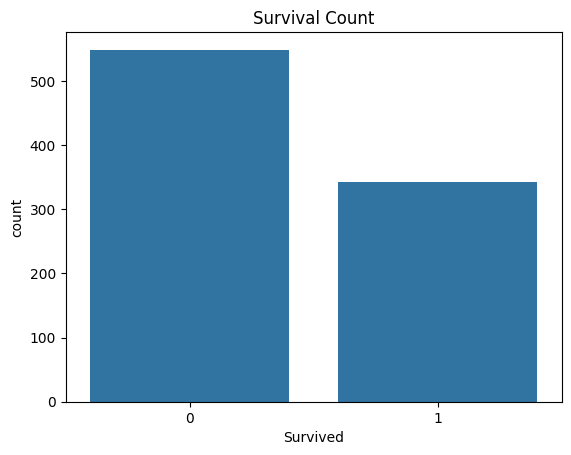

In [38]:
sns.countplot(data=data, x='Survived')
plt.title("Survival Count")
plt.show()

Survival by Gender plot

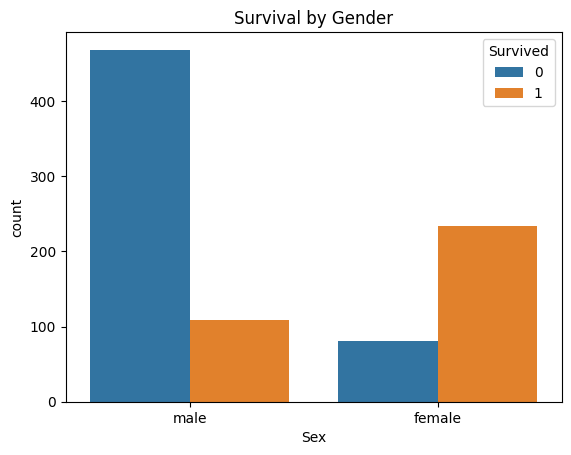

In [39]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

Age Distribution plot

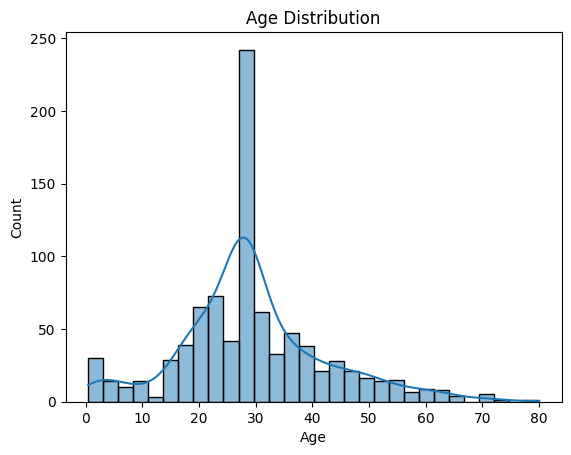

In [40]:
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Passenger class survival plot

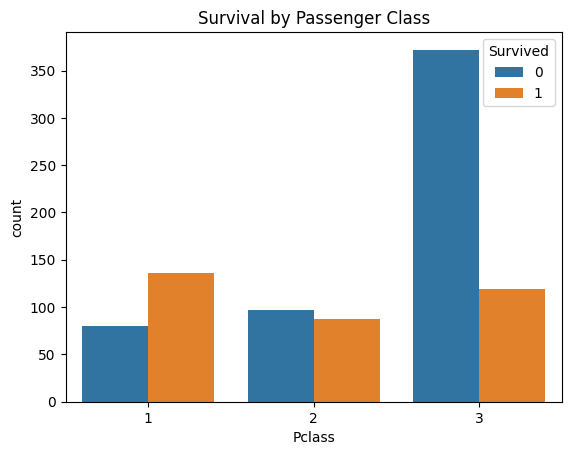

In [41]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

Data Preprocessing

In [42]:
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
data = data.copy()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

Split the data into train and test sets

In [44]:
X = data.drop('Survived', axis=1)
y = data['Survived']
data['Sex'] = data['Sex'].fillna(data['Sex'].median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split completed.")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Data split completed.
Training set size: (712, 4)
Test set size: (179, 4)


 Training the Logistic Regression Model

In [45]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
print("\nModel training completed.")


Model training completed.


Model Evaluation

In [47]:
y_pred = model.predict(X_test)

Accuracy

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.80


Confusion matrix

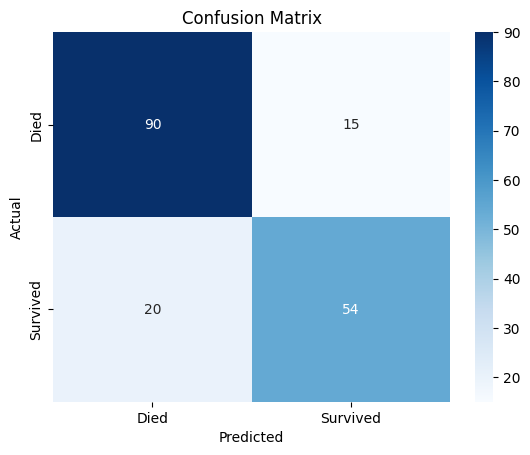

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report

In [50]:
report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        Died       0.82      0.86      0.84       105
    Survived       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Prediction Test

In [52]:
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],  # Male
    'Age': [25],
    'Fare': [7.25]
})

# Predict survival
prediction = model.predict(new_data)
print("\nPrediction for new data:")
print("Survived" if prediction[0] == 1 else "Did not survive")


Prediction for new data:
Did not survive


Handle missing values

In [56]:
from sklearn.impute import SimpleImputer

# Fill numerical columns
age_imputer = SimpleImputer(strategy='median')
X_train['Age'] = age_imputer.fit_transform(X_train[['Age']])
X_test['Age'] = age_imputer.transform(X_test[['Age']])

Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Feature Selection

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Dynamically set n_features_to_select
n_features = X_train.shape[1]  # Total number of features
n_features_to_select = min(3, n_features)  # Select 3 or fewer features, depending on availability

model = LogisticRegression(max_iter=500)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)


Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_


Handle Class Imbalance

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

Train the Improved Model

In [66]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

Evaluate the Model

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7877094972067039
Precision: 0.7307692307692307
Recall: 0.7702702702702703
F1 Score: 0.75
Confusion Matrix:
 [[84 21]
 [17 57]]


Cross-Validation for Generalization

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.7714022725830001
